# ENTREGA DEEP LEARNING

## Integrantes:

 + Jorge Peralta Fernández-Revuelta Lechuga

 + Alberto García Martín

 + Ignacio Urretavizcaya Tato

 + Juan López Segura

## Paso 0 (Sólo si se desean entrenar modelos en W&B):

 + En terminal, habiendo activado el entorno: wandb login

 + Pegar la API KEY: a8be9b6fcd7b2715da8018421e06657d1e080477

In [1]:
import sys
from pathlib import Path
import os
import numpy as np
import torchvision

In [2]:
# Obtener la ruta absoluta de la carpeta que contiene el módulo
root_dir = Path.cwd().resolve().parent

# Agregar la ruta de la carpeta al sys.path
sys.path.append(str(root_dir))

In [3]:
root_dir


WindowsPath('C:/Users/LOLI/Desktop/ICAI/2º SEMESTRE/NO ESTRUCURADOS/TRABAJO FINAL/ADNE/src/2.Image Classification')

In [5]:
from src.utils.cnn import CNN, load_model_weights
from src.utils.local_functs import show_images_grid
from config.variables import Model_loaded

# Load data
from src.utils.data_loader import num_classes, train_loader, valid_loader,test_loader
from config.variables import Number_random_images, Number_rows, Number_cols

## 1. Creación del Modelo de Clase

### Carga de Modelo y Datos

Se comienza con la carga de los modelos preentrenados de pytorch, para posteriormente utilizarlos en la práctica.

In [12]:
# Pytorch has many pre-trained models that can be used for transfer learning
classification_models = torchvision.models.list_models(module=torchvision.models)

Comenzamos utilizando el modelo de clase, con los datos de entrenamiento y validación proporcionados.

### Visualización de Muestra

Posteriormente, se presentan algunas imágenes del conjunto para conocer mejor el conjunto de datos.

In [6]:
# Obtener la cantidad de imágenes en el conjunto de datos de entrenamiento (es interesante saberlo a la hora de establecer el batch size, por ejemplo)
train_images_quant = len(train_loader.dataset)

# Imprimir la cantidad de imágenes en el conjunto de datos de entrenamiento
print("Cantidad de imágenes en el conjunto de datos de entrenamiento:", train_images_quant)

Cantidad de imágenes en el conjunto de datos de entrenamiento: 20994


In [7]:
os.getcwd()

'c:\\Users\\LOLI\\Desktop\\ICAI\\2º SEMESTRE\\NO ESTRUCURADOS\\TRABAJO FINAL\\ADNE\\src\\2.Image Classification\\src'

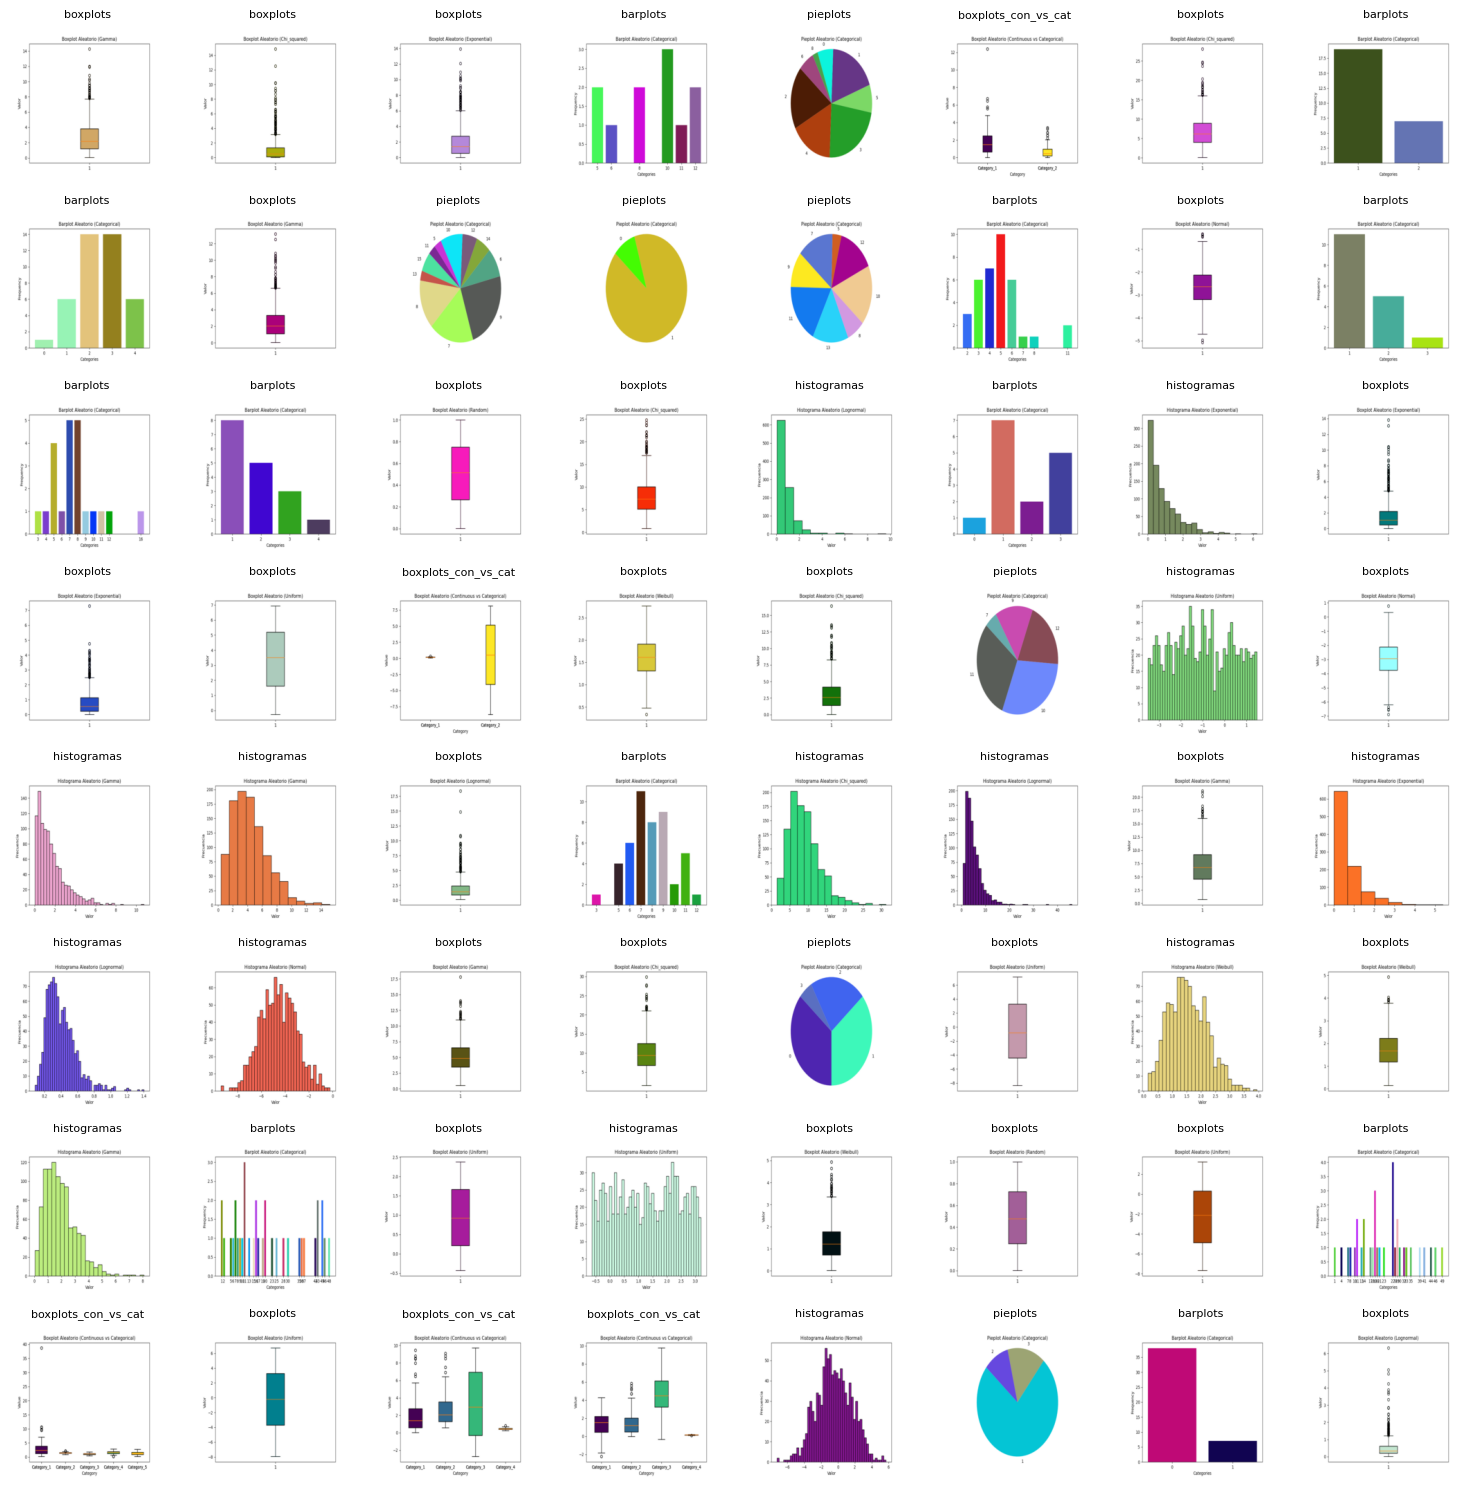

In [9]:
# Obtener 8x8 imágenes aleatorias
random_indices = np.random.choice(len(valid_loader.dataset), size=Number_random_images, replace=False)
images = [valid_loader.dataset[i][0] for i in random_indices]
classes = [valid_loader.dataset[i][1] for i in random_indices]
classnames = train_loader.dataset.classes
titles = [classnames[x] for x in classes]

# Mostrar la cuadrícula de imágenes
show_images_grid(images, titles, rows=Number_rows, cols=Number_cols)

A priori no se encuentra nada raro en el conjunto de datos:

 + Las imágenes parecen estar en la misma orientación.

 + Todas se encuentran en blanco y negro.

 + No parece haber problemas con el tamaño de imagen especificado.

 + Parecen estar bien etiquetadas.

### Entrenamiento

Se procede a un entrenamiento básico de la red para comprobar que funcione correctamente, que se realiza en el fichero `model_training.py`. 

### Predicciones

Por último, se carga el modelo entrenado con sus respectivos pesos y se realiza una predicción, para observar su desempeño.

#### Carga del Modelo

In [4]:
# Load model
model_weights = load_model_weights('resnet50-1epoch')
model_used = torchvision.models.resnet50(weights='DEFAULT')

my_trained_model = CNN(model_used, num_classes)
my_trained_model.load_state_dict(model_weights)

<All keys matched successfully>

### Resultados

In [5]:
predicted_labels = my_trained_model.predict(valid_loader)

classnames = valid_loader.dataset.classes
predicted_classes = [classnames[x] for x in predicted_labels]

In [5]:
# Obtener la cantidad de imágenes en el conjunto de datos de validación
valid_images_quant = len(train_loader.dataset)

# Imprimir la cantidad de imágenes en el conjunto de datos de entrenamiento
print("Cantidad de imágenes en el conjunto de datos de entrenamiento:", valid_images_quant)

Cantidad de imágenes en el conjunto de datos de entrenamiento: 2985


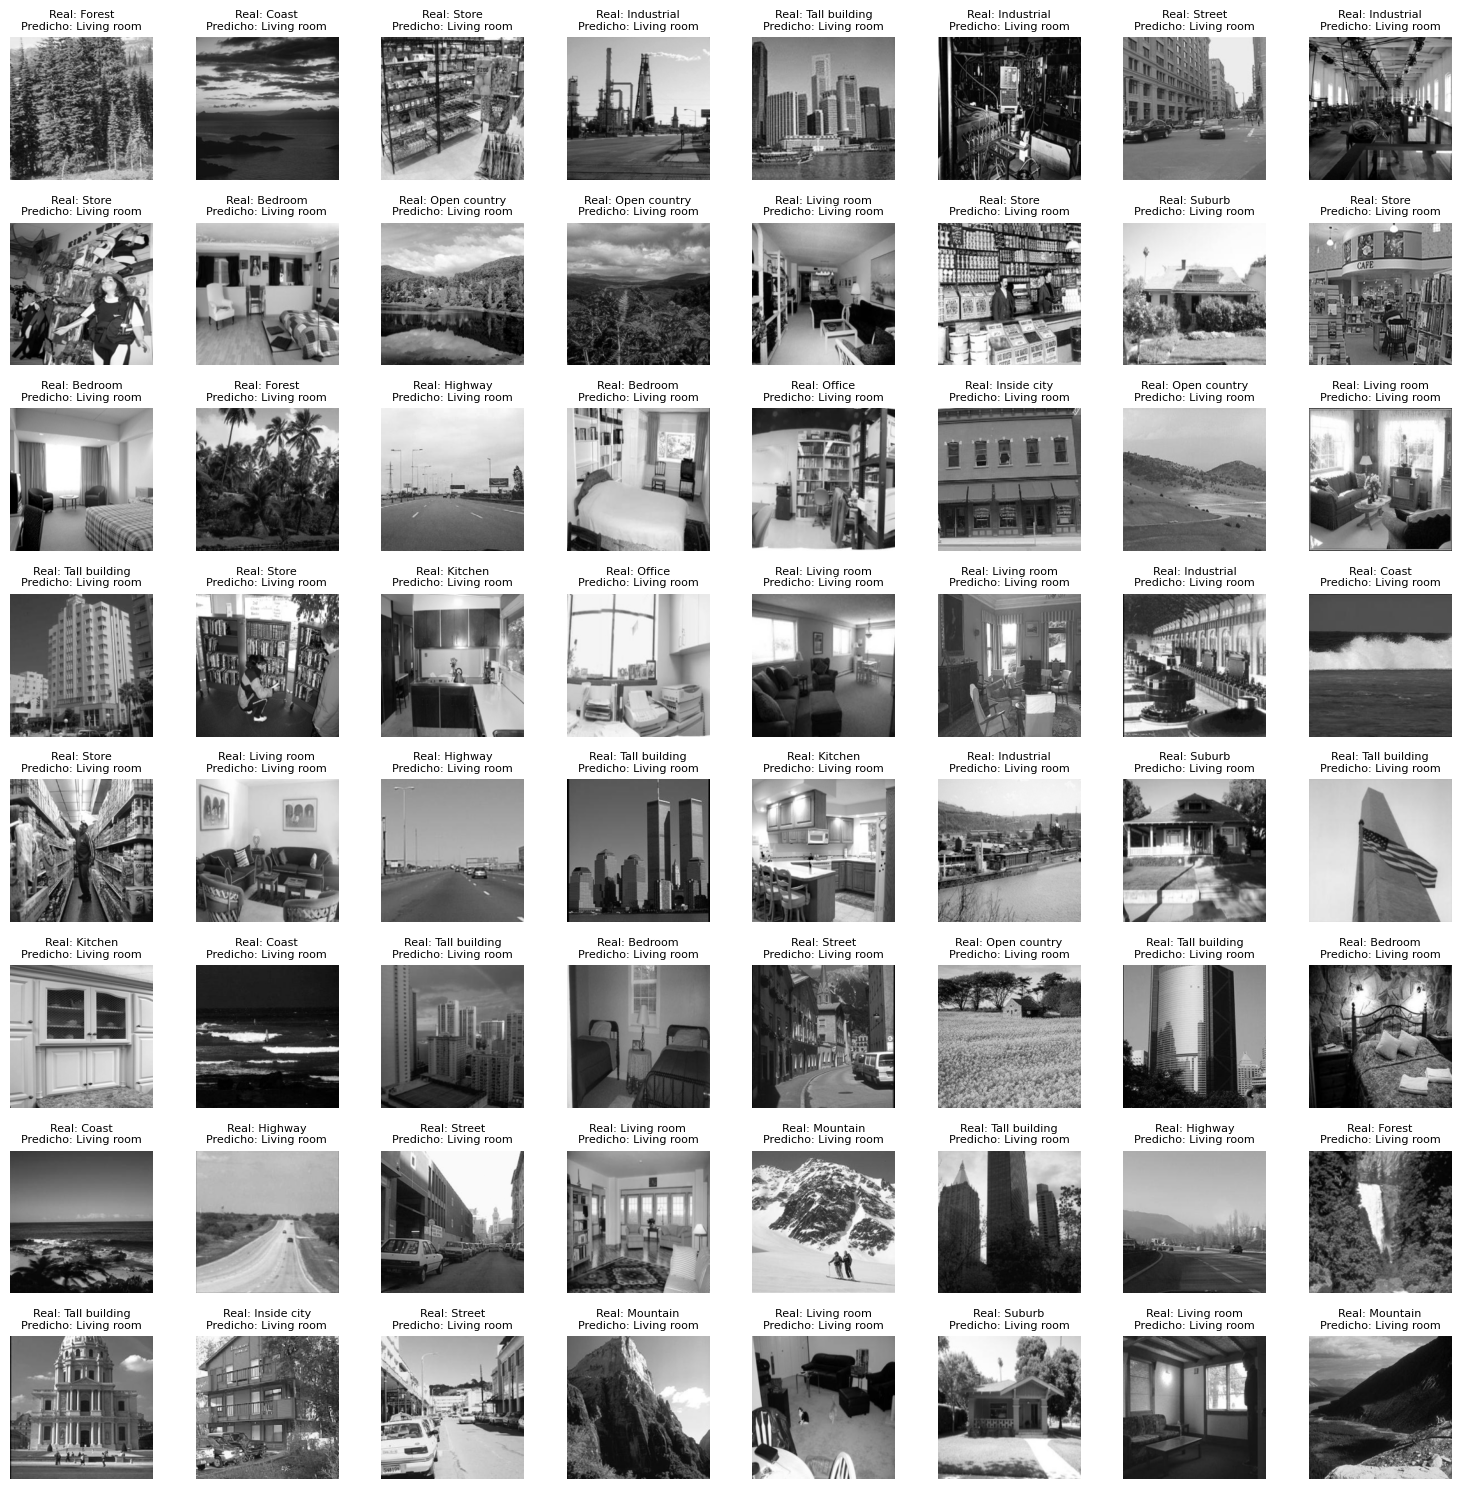

In [6]:
# Obtener 8x8 imágenes aleatorias del conjunto de validación
from config.variables import Number_random_images_val, Number_rows_val, Number_cols_val
random_indices = np.random.choice(len(valid_loader.dataset), size=Number_random_images_val, replace=False)
inputs = [valid_loader.dataset[i][0] for i in random_indices]
classes = [valid_loader.dataset[i][1] for i in random_indices]


# Crear títulos con la clase real y la clase predicha
titles = [f'Real: {classnames[classes[i]]}\nPredicho: {predicted_classes[i]}' for i in range(len(classes))]

# Mostrar la cuadrícula de imágenes
show_images_grid(inputs, titles, rows=Number_rows_val, cols=Number_cols_val)

Como podemos ver, los resultados del modelo son bastante pobres (el modelo funciona, aunque parezca que a todos les pone la misma clase. Añadiendo más imágenes, y cambiando el figsize en la función en local_functs, se pueden ver otros casos).

Esta metodología no está mal para un modelo, pero en nuestro caso (en el que se buscan comparar una gran cantidad de modelos diferentes y con muchos parámetros), se recomienda el uso de Weights & Biases para monitorizar las distintas métricas deseadas. Por tanto, hacemos una pequeña prueba.

## 2. Primer Modelo en W&B

Todo esto se ejecuta en model_training, se deja esta primera versión comentada para que sirva de explicación, guía y utilidad para quien la necesite.

In [19]:
# # start a new wandb run to track this script
# import wandb
# wandb.init(
#     # set the wandb project where this run will be logged
#     project="ML2-CNN-PROJECT",
    
#     # track hyperparameters and run metadata
#     config={
#     "learning_rate": 0.02,
#     "architecture": "my_trained_model",
#     "dataset": "YourDataset",
#     "epochs": 4,
#     }
# )

In [20]:
# # Instancia tu modelo de CNN

# my_trained_model = CNN(torchvision.models.resnet50(weights='DEFAULT'), num_classes)

# # Define el optimizador y la función de pérdida
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# criterion = torch.nn.CrossEntropyLoss()

# # Entrenamiento del modelo
# epochs = 3
# for epoch in range(epochs):
#     running_loss = 0.0
#     correct = 0
#     total = 0

#     for images, labels in train_loader:
#         # Zero gradient
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(images)
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         # Track training loss
#         running_loss += loss.item()

#         # Track accuracy
#         _, predicted = torch.max(outputs, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     # Calculate accuracy and loss
#     train_loss = running_loss / len(train_loader)
#     train_accuracy = correct / total

#     # Log metrics to W&B
#     wandb.log({"train_loss": train_loss, "train_accuracy": train_accuracy})

# # Finaliza el run de W&B
# wandb.finish()


## 3. Creación de app en Streamlit y explicación del funcionamiento

Para ello, únicamente se necesita tener instalada la librería en el environment, algo que con el `requirements.txt` ya está hecho. Con esto, únicamente se necesita ejecutar en una terminal (Ctrl + ñ para abrir terminal):

 + streamlit run app.py 

Es necesario que en la terminal la ruta sea la misma donde se encuentra el fichero `app.py`.

Este fichero únicamente carga los modelos guardados y entrenados previamente, lee y procesa la imagen subida por el usuario a la aplicación y devuelve el resultado del modelo para dicha imagen, usando el modelo especificado por el usuario.

## 4. Entrenamiento de Modelos y presentación de Resultados

Los resultados se obtienen en la web de Weights & Biases. No obstante, si se desea, aquí se pueden cargar los modelos y observar sus resultados para una muestra aleatoria de las imágenes de validación.

In [ ]:
# Load model
model_weights = load_model_weights(Model_loaded)

my_trained_model = CNN(model_used, num_classes)
my_trained_model.load_state_dict(model_weights)

In [ ]:
predicted_labels = my_trained_model.predict(valid_loader)

classnames = valid_loader.dataset.classes
predicted_classes = [classnames[x] for x in predicted_labels]

In [ ]:
# Obtener 8x8 imágenes aleatorias del conjunto de validación
from config.variables import Number_random_images_val, Number_rows_val, Number_cols_val
random_indices = np.random.choice(len(valid_loader.dataset), size=Number_random_images_val, replace=False)
inputs = [valid_loader.dataset[i][0] for i in random_indices]
classes = [valid_loader.dataset[i][1] for i in random_indices]


# Crear títulos con la clase real y la clase predicha
titles = [f'Real: {classnames[classes[i]]}\nPredicho: {predicted_classes[i]}' for i in range(len(classes))]

# Mostrar la cuadrícula de imágenes
show_images_grid(inputs, titles, rows=Number_rows_val, cols=Number_cols_val)